# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [188]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [189]:
# Read the Mapbox API key
load_dotenv("../Resources/.env")
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [190]:
# Import the necessary CSVs to Pandas DataFrames
coordinates_data = pd.read_csv(Path("../Resources/neighborhoods_coordinates.csv"))

In [191]:
file_path = Path("../Resources/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [192]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    mean_units_by_year = sfo_data[['housing_units']].groupby(sfo_data.index).mean()
    
    fig = plt.figure(figsize = (10, 5))
    
    plt.bar(mean_units_by_year.index, mean_units_by_year.housing_units)
    
    bottom_limit = (min(mean_units_by_year['housing_units']) - int(mean_units_by_year.std()))
    top_limit = (max(mean_units_by_year['housing_units']) + int(mean_units_by_year.std()))
    
    plt.ylim(bottom_limit, top_limit)
    plt.ylabel('Housing Units', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.title('Housing Units in San Fransisco from 2010 to 2016', fontsize = 18, fontweight = 'bold')
    
    plt.close(fig)
    plot = pn.pane.Matplotlib(fig)
    

    return plot

    
housing_units_per_year()
    
    
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    price_sqr_foot_data = sfo_data["sale_price_sqr_foot"].groupby("year").mean()
    gross_rent_data = sfo_data["gross_rent"].groupby("year").mean()
    price_data_df = pd.concat([price_sqr_foot_data, gross_rent_data], axis=1, join='inner')
    
    fig = plt.figure(figsize = (10, 5))
    
    plt.plot(price_data_df.index, price_data_df.gross_rent)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Gross Rent', fontsize=14)
    plt.title("Average Gross Rent by Year", fontsize = 18, fontweight = 'bold')

    plt.close(fig)
    plot = pn.pane.Matplotlib(fig)
    
    return plot

def average_sales_price():
    """Average Sales Price Per Year."""
    price_sqr_foot_data = sfo_data["sale_price_sqr_foot"].groupby("year").mean()
    gross_rent_data = sfo_data["gross_rent"].groupby("year").mean()
    price_data_df = pd.concat([price_sqr_foot_data, gross_rent_data], axis=1, join='inner')
    
    fig = plt.figure(figsize=(10, 5))
    
    plt.plot(price_data_df.index, price_data_df.sale_price_sqr_foot)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Price per SqFt', fontsize=14)
    plt.title("Average Price per Square Foot by Year", fontsize = 18, fontweight = 'bold')

    plt.close(fig)
    plot = pn.pane.Matplotlib(fig)
    
    return plot


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    sfo_df = sfo_data.reset_index().groupby(['year', 'neighborhood'], as_index=False)
    sfo_df = sfo_df.mean()
    
    fig = sfo_df.hvplot.line(x='year', 
                              y='sale_price_sqr_foot', 
                              title='Average Price per SqFt by Neighborhood',
                              groupby='neighborhood',
                              xlabel='Year',
                              ylabel="Price per Sqaure Foot",
                              color = 'red')
    
    
    return fig

def average_gross_rent_by_neighborhood():
    """Average Gross Rent by Neighborhood."""

    sfo_df = sfo_data.reset_index().groupby(['year', 'neighborhood'], as_index=False)
    sfo_df = sfo_df.mean() 
        
    fig = sfo_df.hvplot.line(x='year', 
                              y='gross_rent', 
                              title='Average Gross Rent by Neighborhood', 
                              groupby='neighborhood',
                              xlabel='Year',
                              ylabel="Price per Sqaure Foot")
    
    
    
    
    return fig
        
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    top_neighborhoods = sfo_data.reset_index().groupby(['neighborhood', 'sale_price_sqr_foot'], as_index=False).mean()
    top_neighborhoods_df = (
                            top_neighborhoods
                            .groupby("neighborhood")
                            .mean()
                            .sort_values("sale_price_sqr_foot", ascending=False)
                            .reset_index()
                            )
    top_neighborhoods_df = top_neighborhoods_df[:10]
    top_neighborhoods_plot = top_neighborhoods_df.hvplot.bar(title='Top 10 Expensive Neighborhoods in SFO',
                            x='neighborhood',
                            y='sale_price_sqr_foot',
                            rot=60,
                            frame_height=350,
                               frame_width=700,
                               xlabel='Neighborhood',
                               ylabel="Average Price per SqFt",
                               ylim=(550, 950))
    
    
    
    return top_neighborhoods_plot

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    

    fig = sfo_data.hvplot.bar(
                                            y=('sale_price_sqr_foot', 'gross_rent'),
                                            x='year',
                                            groupby='neighborhood',
                                            title="Average Sale Price per SqFt and Average Gross Rent by Year",
                                            rot=70,
                                            xlabel='Year',
                                            ylabel='Price',
                                            legend='top',
                                            frame_height=350,
                                                frame_width=700,
                                            )
    

    
    return fig
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    mean_data = sfo_data.groupby('neighborhood', as_index=False).mean()
    top_neighborhoods = sfo_data.reset_index().groupby(['neighborhood', 'sale_price_sqr_foot'], as_index=False).mean()
    top_neighborhoods_df = (top_neighborhoods.groupby("neighborhood").mean()
                            .sort_values("sale_price_sqr_foot", ascending=False)
                            .reset_index()
                            )
    top_neighborhoods_df = top_neighborhoods_df[:10]
    df_expensive_neighborhoods_per_year = mean_data[mean_data["neighborhood"].isin(top_neighborhoods_df["neighborhood"])]
    expensive_coordinates_plot = px.parallel_coordinates(
                            df_expensive_neighborhoods_per_year,
                            color='sale_price_sqr_foot',
                            dimensions=['sale_price_sqr_foot', 'gross_rent', 'housing_units'],
                            labels={
                                'sale_price_sqr_foot': 'Price per SqFT',
                                'gross_rent': 'Gross Rent',
                                'housing_units': 'Housing Units'},
                                )
    
    
    return expensive_coordinates_plot



def parallel_categories():
    """Parallel Categories Plot."""
    mean_data = sfo_data.groupby('neighborhood', as_index=False).mean()
    top_neighborhoods = sfo_data.reset_index().groupby(['neighborhood', 'sale_price_sqr_foot'], as_index=False).mean()
    top_neighborhoods_df = (top_neighborhoods.groupby("neighborhood").mean()
                            .sort_values("sale_price_sqr_foot", ascending=False)
                            .reset_index()
                            )
    top_neighborhoods_df = top_neighborhoods_df[:10]
    df_expensive_neighborhoods_per_year = mean_data[mean_data["neighborhood"].isin(top_neighborhoods_df["neighborhood"])]
    expensive_categories_plot = px.parallel_categories(
                            df_expensive_neighborhoods_per_year,
                            color='sale_price_sqr_foot',
                            dimensions=['sale_price_sqr_foot', 'gross_rent', 'housing_units'],
                            labels={
                                'sale_price_sqr_foot': 'Price per SqFT',
                                'gross_rent': 'Gross Rent',
                                'housing_units': 'Housing Units'},
                                )
    
    
    
    return expensive_categories_plot


def neighborhood_map():
    """Neighborhood Map."""

    mean_data = sfo_data.groupby('neighborhood', as_index=False).mean()
    average_values_by_location = pd.concat([mean_data, coordinates_data], axis=1)
    neighborhood_data_plot = px.scatter_mapbox(
                            average_values_by_location,
                            lat='Lat',
                            lon='Lon',
                            color='gross_rent',
                            size='sale_price_sqr_foot',
                            title="Average Sale Price per Square Foot and Gross Rent in San Fransisco",
                            zoom=10,
                            width=1000,
                            hover_name='neighborhood',
                            hover_data={'housing_units': True, 'Lat':False, 'Lon':False, 'sale_price_sqr_foot':':.2f',
                                       'gross_rent':':.2f'},
                            labels={
                                'sale_price_sqr_foot': 'Price per SqFT',
                                'gross_rent': 'Gross Rent',
                                'housing_units': 'Housing Units'}
                                )
    
    
    
    return neighborhood_data_plot
    
def sunburst():
    """Sunburst Plot."""
    sfo_df_sunburst = sfo_data.reset_index()
    sfo_df_sunburst = pd.DataFrame(sfo_df_sunburst).sort_values(['year', 'sale_price_sqr_foot'], ascending=False)
    sfo_df_sunburst_2016 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2016][:10]
    sfo_df_sunburst_2015 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2015][:10]
    sfo_df_sunburst_2014 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2014][:10]
    sfo_df_sunburst_2013 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2013][:10]
    sfo_df_sunburst_2012 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2012][:10]
    sfo_df_sunburst_2011 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2011][:10]
    sfo_df_sunburst_2010 = sfo_df_sunburst[sfo_df_sunburst['year'] == 2010][:10]
    frames = [sfo_df_sunburst_2016, sfo_df_sunburst_2015, sfo_df_sunburst_2014, sfo_df_sunburst_2013, sfo_df_sunburst_2012, sfo_df_sunburst_2011, sfo_df_sunburst_2010]
    top_10_by_year = pd.concat(frames)
    
    sunburst_plot = px.sunburst(
                            top_10_by_year,
                            path=['year', 'neighborhood'],
                            values='sale_price_sqr_foot',
                            color='gross_rent',
                            color_continuous_scale='RdBu',
                            color_continuous_midpoint=np.average(top_10_by_year['sale_price_sqr_foot'], 
                            weights=top_10_by_year['gross_rent']),
                            hover_name='neighborhood',
                            hover_data={'housing_units': True, 'sale_price_sqr_foot':':.2f',
                                       'gross_rent':':.2f'},
                            labels={
                                'sale_price_sqr_foot': 'Price per SqFT',
                                'gross_rent': 'Gross Rent',
                                'parent': 'Year'},
                            width = 700,
                            height= 700,
                            title = 'Sunburst Plot for Top 10 Most Expensive Neighborhoods by Year')

    
    
    return sunburst_plot
    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [193]:
# Create a Title for the Dashboard
dashboard_title = '# San Fransisco Real Estate Price Data from 2010 - 2016'
dashboard_description = '## This dashboard contains various visual representations of the changes in gross rent, number of housing units, and price per square footage of San Fransisco neighborhoods from 2010 to 2016'

# Create a tab layout for the dashboard
column_t1 = pn.Column(dashboard_title, dashboard_description, neighborhood_map())
row_t2 = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())
row_t3 = pn.Column('## Price and Rent Data, by Neighborhood', average_price_by_neighborhood(), average_gross_rent_by_neighborhood())
column_t4 = pn.Column(most_expensive_neighborhoods_rent_sales(), top_most_expensive_neighborhoods())
column_t5 = pn.Column('## Interactive Parallel Plots', parallel_coordinates(), parallel_categories())

row_of_charts = pn.Column(housing_units_per_year())

# Create the dashboard
tabs = pn.Tabs(
    ("Welcome", column_t1),
    ("Yearly Market Analysis", row_t2),
    ("Neighborhood Rent Analysis", row_t3),
    ("Most Expensive Neighborhoods", column_t4),
    ("Paralell Plots", column_t5),
    ("Sunburst", sunburst())
    )

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
    [1] Row
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [3] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] HoloViews(Bars)
    [4] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
    [5] Plotly(Figure, name='Sunburst')
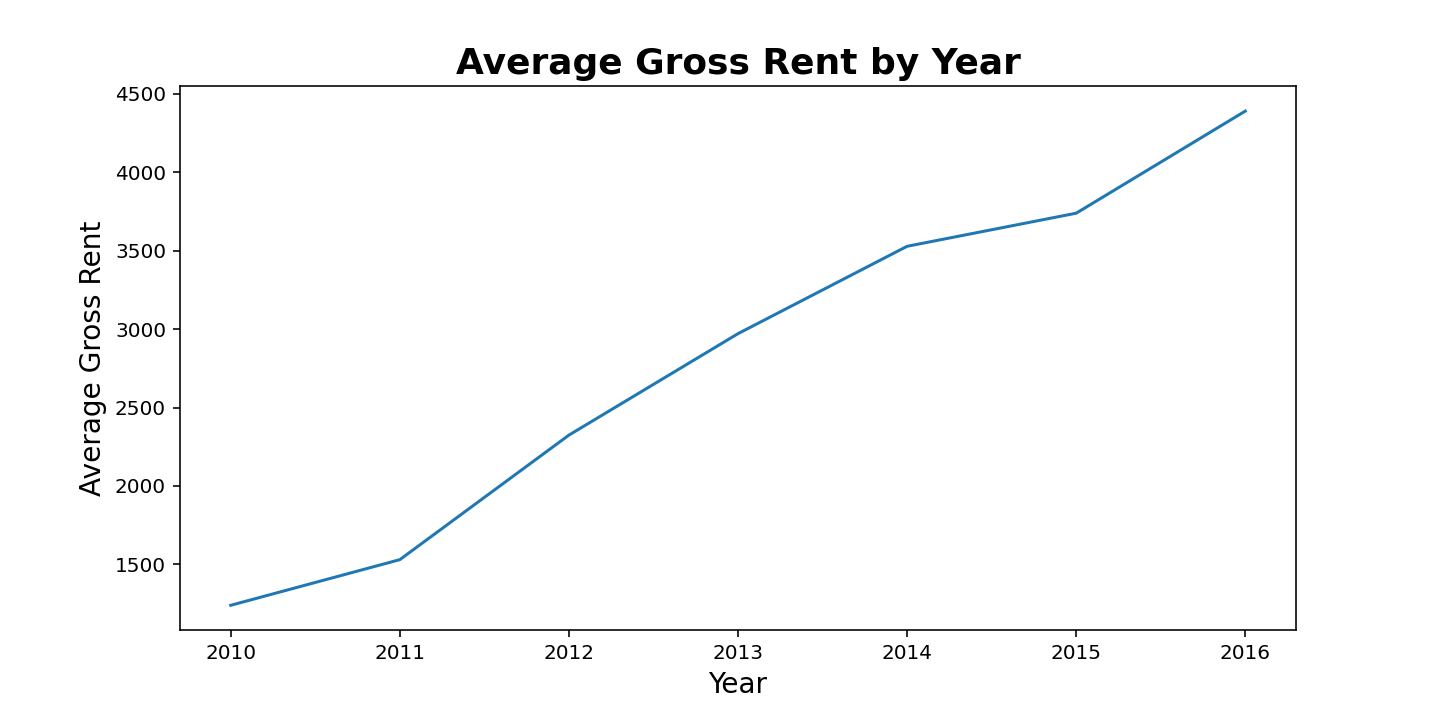
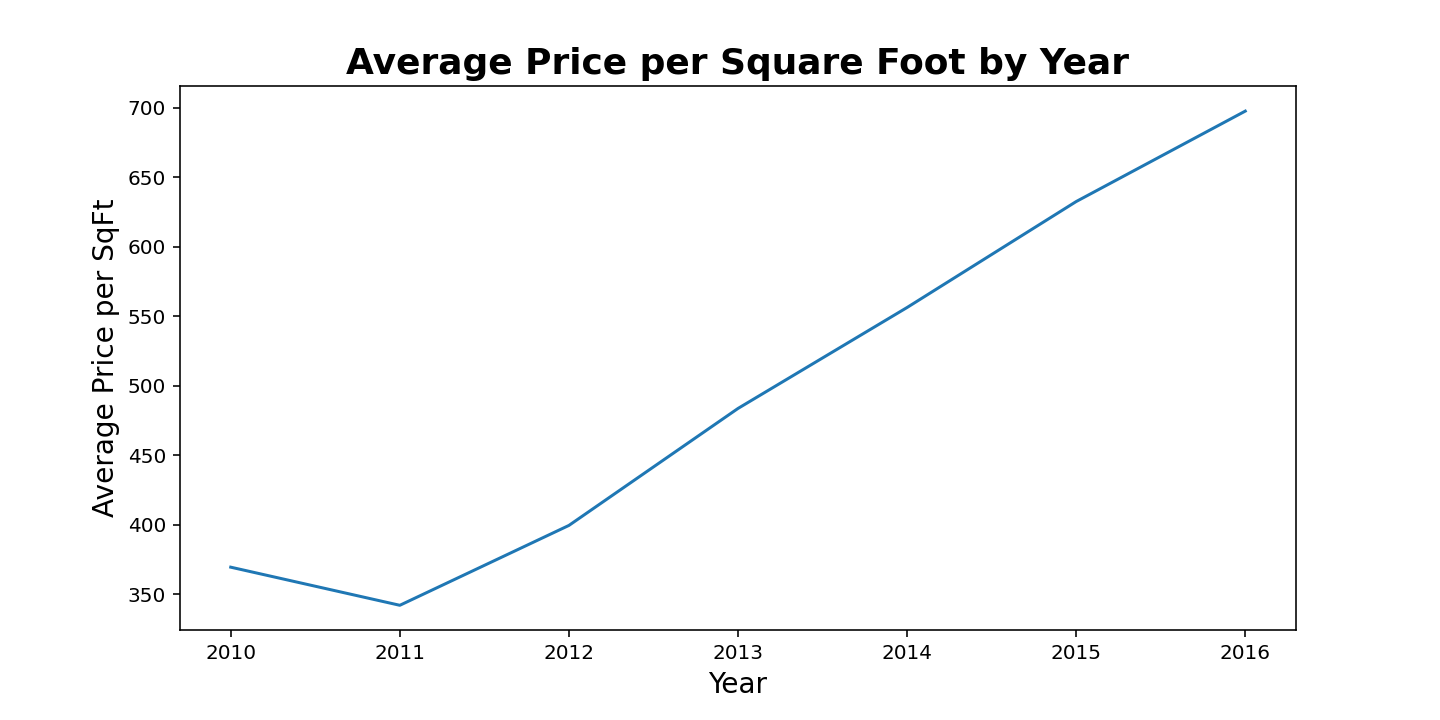
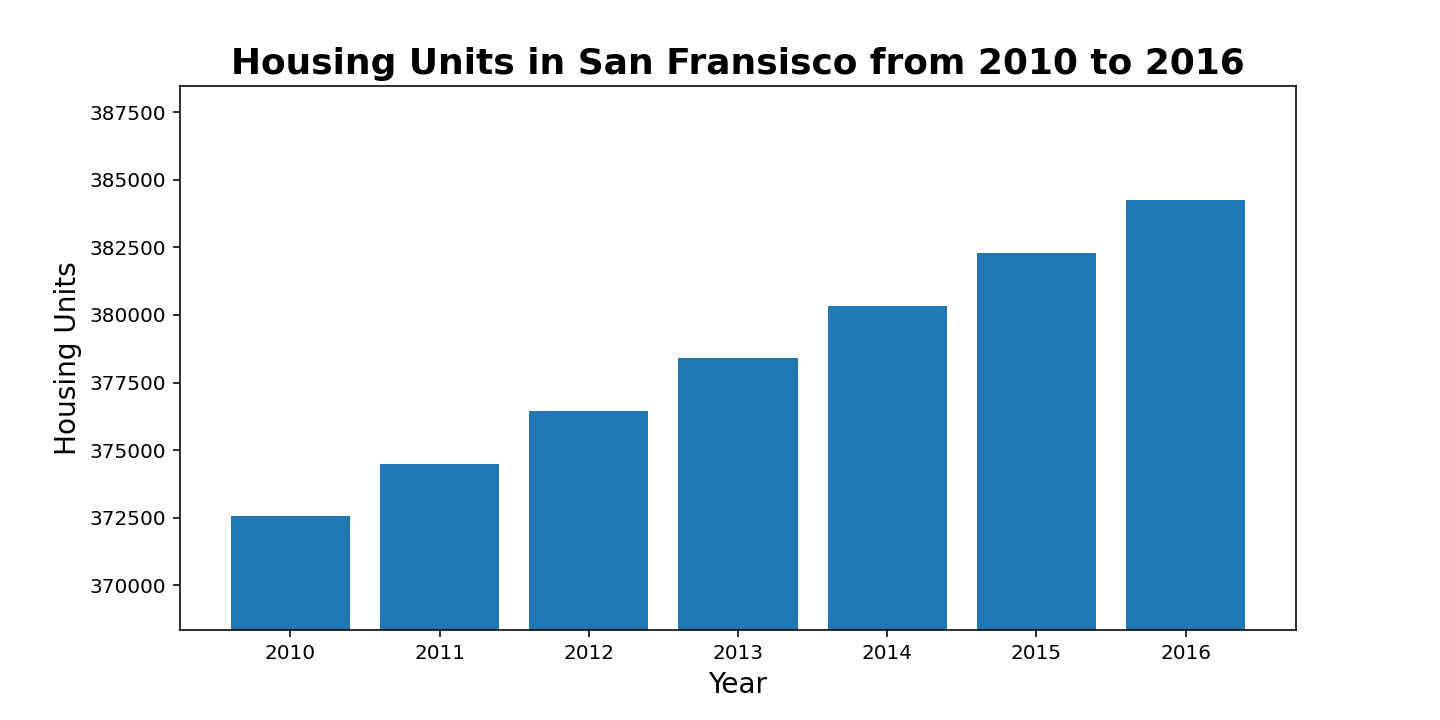

In [194]:
# Serve the dashboard
tabs